# NumPy for images

In [47]:
%matplotlib inline

In [48]:
import numpy as np
import matplotlib.pyplot as plt

In [49]:
from skimage import data
camera = data.camera()
print(type(camera), camera.shape, camera.size)
# image intensities
print(camera.min(), camera.max(), camera.mean())

<class 'numpy.ndarray'> (512, 512) 262144
0 255 118.31400299072266


## indexing for pixel read/write ops
- 1st dimension = rows
- 2nd dimension = cols
- [0,0] = top left corner

In [50]:
print(camera[10,20])

# set pixel at 3rd row, 10 column to black
camera[3,10] = 0

153


In [51]:
# set 1st 10 lines to black
camera[:10] = 0

In [52]:
# masking (indexing with boolean masks)

mask = camera < 87
camera[mask] = 255 # set to white

In [53]:
# fancy indexing (indexing with sets of indices)

inds_r = np.arange(len(camera))
inds_c = 4 * inds_r % len(camera)
camera[inds_r, inds_c] = 0

In [54]:
# defining a region of interest (for example, a disk)

nrows, ncols = camera.shape
row, col = np.ogrid[:nrows, :ncols]
cnt_row, cnt_col = nrows/2, ncols/2

outer_disk_mask = (
    (row - cnt_row)**2 + 
    (col - cnt_col)**2 >
    (nrows/2)**2)

camera[outer_disk_mask] = 0

In [55]:
# more complex masks

lower_half = row > cnt_row
lower_half_disk = np.logical_and(lower_half, outer_disk_mask)

camera = data.camera()
camera[lower_half_disk] = 0 # set to black

In [56]:
## color images

In [57]:
cat = data.chelsea()
print(cat.dtype, cat.shape)

print(cat[10,20])

cat[50,60] = 0 # black
cat[50,61] = [0,255,0] # red, green, blue
print(cat[50,61])

uint8 (300, 451, 3)
[151 129 115]
[  0 255   0]


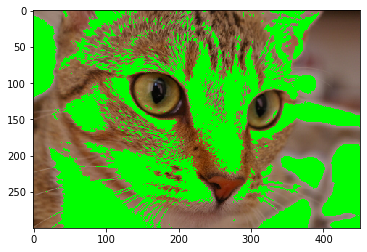

In [58]:
# 2D mask on 2D color image
reddish = cat[:,:,0] > 160
cat[reddish] = [0,255,0]
plt.imshow(cat)

## coordinates

In [ ]:
im3d = np.random.rand(100,1000,1000)
from skimage import morphology
from scipy import ndimage as ndi

seeds = ndi.label(im3d < 0.1)[0]

ws = morphology.watershed(im3d, seeds)

In [ ]:
print(ws.dtype, ws.shape)

In [ ]:
from skimage import segmentation
slics = segmentation.slic(im3d, spacing=[5,1,1], multichannel=False)

from skimage import filters
edges = np.empty_like(im3d)
for pln, image in enumerate(im3d):
    edges[pln] = filters.sobel(image)

## array dimension order
- important for optimal memory access (prefetching)
- adjacent elements = faster

In [46]:
def in_order_multiply(arr,scalar):
    for plane in list(range(arr.shape[0])):
        arr[plane, :, :] *= scalar

def out_of_order_multiply(arr, scalar):
    for plane in list(range(arr.shape[2])):
        arr[:, :, plane] *= scalar

im3d = np.random.rand(100, 1024, 1024)

import time
t0 = time.time(); x =     in_order_multiply(im3d, 5); 
t1 = time.time()
s0 = time.time(); x = out_of_order_multiply(im3d, 5); 
s1 = time.time()

print("%.2f seconds" % (t1 - t0))  
print("%.2f seconds" % (s1 - s0))  
print("Speedup: %.1fx" % ((s1 - s0) / (t1 - t0)))  

0.09 seconds
1.24 seconds
Speedup: 14.1x


In [6]:
## time dimension